# Supervised Machine Learning: Regression

## Linear Regression

![](https://raw.githubusercontent.com/dipanjanS/appliedml_workshop_dhs_av_2019/e025a19ca63d3fc03ec38fbbd43ae945f49a2494/Module%204%20-%20Supervised%20ML%20-%20Regression/assets/lr_001.png)

Simple linear regression is an approach for predicting a **continuous response** using a **single feature**. It takes the following form:

$y = \beta_0 + \beta_1x$

- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

$\beta_0$ and $\beta_1$ are called the **model coefficients**:

- We must "learn" the values of these coefficients to create our model.
- And once we've learned these coefficients, we can use the model to predict Sales.

### Estimating ("learning") model coefficients

- Coefficients are estimated during the model fitting process using the **least squares criterion**.
- We are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").

![Estimating coefficients](https://raw.githubusercontent.com/dipanjanS/appliedml_workshop_dhs_av_2019/e025a19ca63d3fc03ec38fbbd43ae945f49a2494/Module%204%20-%20Supervised%20ML%20-%20Regression/assets/estimating_coefficients.png)

In this diagram:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

![Slope-intercept](https://raw.githubusercontent.com/dipanjanS/appliedml_workshop_dhs_av_2019/e025a19ca63d3fc03ec38fbbd43ae945f49a2494/Module%204%20-%20Supervised%20ML%20-%20Regression/assets/slope_intercept.png)

How do the model coefficients relate to the least squares line?

- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Let's estimate the model coefficients for the advertising data:

---

## Dataset

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

### Predictor

* SalePrice: The property's sale price in dollars. 

### Features

<table>
  <tbody>    
    <tr valign="top">
      <td valign="top">
        <ul>
          <li>MoSold: Month Sold</li>
          <li>YrSold: Year Sold</li><br>
          <li>SaleType: Type of sale</li>
          <li>SaleCondition: Condition of sale</li><br>
          <li>MSSubClass: The building class</li>
          <li>MSZoning: The general zoning classification</li><br>
          <li>Neighborhood: Physical locations within Ames city limits</li>
          <li>Street: Type of road access</li>
          <li>Alley: Type of alley access</li><br>
          <li>LotArea: Lot size in square feet</li>
          <li>LotConfig: Lot configuration</li>
          <li>LotFrontage: Linear feet of street connected to property</li>
          <li>LotShape: General shape of property</li><br>
          <li>LandSlope: Slope of property</li>
          <li>LandContour: Flatness of the property</li><br>
          <li>YearBuilt: Original construction date</li>
          <li>YearRemodAdd: Remodel date</li>
          <li>OverallQual: Overall material and finish quality</li>
          <li>OverallCond: Overall condition rating</li><br>
          <li>Utilities: Type of utilities available</li>
          <li>Foundation: Type of foundation</li>
          <li>Functional: Home functionality rating</li><br>
          <li>BldgType: Type of dwelling</li>
          <li>HouseStyle: Style of dwelling</li><br>
          <li>1stFlrSF: First Floor square feet</li>
          <li>2ndFlrSF: Second floor square feet</li>
          <li>LowQualFinSF: Low quality finished square feet (all floors)</li>
          <li>GrLivArea: Above grade (ground) living area square feet</li>
          <li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li><br>
          <li>Condition1: Proximity to main road or railroad</li>
          <li>Condition2: Proximity to main road or railroad (if a second is present)</li><br>          
          <li>RoofStyle: Type of roof</li>
          <li>RoofMatl: Roof material</li><br>
          <li>ExterQual: Exterior material quality</li>
          <li>ExterCond: Present condition of the material on the exterior</li>
          <li>Exterior1st: Exterior covering on house</li>
          <li>Exterior2nd: Exterior covering on house (if more than one material)</li><br><br>         
        </ul>
      </td>      
      <td valign="top">
        <ul>
          <li>MasVnrType: Masonry veneer type</li>
          <li>MasVnrArea: Masonry veneer area in square feet</li><br>       
          <li>WoodDeckSF: Wood deck area in square feet</li>
          <li>OpenPorchSF: Open porch area in square feet</li>
          <li>EnclosedPorch: Enclosed porch area in square feet</li>
          <li>3SsnPorch: Three season porch area in square feet</li>
          <li>ScreenPorch: Screen porch area in square feet</li><br>
          <li>PoolArea: Pool area in square feet</li>
          <li>PoolQC: Pool quality</li>
          <li>Fence: Fence quality</li>
          <li>PavedDrive: Paved driveway</li><br>
          <li>GarageType: Garage location</li>
          <li>GarageYrBlt: Year garage was built</li>
          <li>GarageFinish: Interior finish of the garage</li>
          <li>GarageCars: Size of garage in car capacity</li>
          <li>GarageArea: Size of garage in square feet</li>
          <li>GarageQual: Garage quality</li>
          <li>GarageCond: Garage condition</li><br>
          <li>Heating: Type of heating</li>
          <li>HeatingQC: Heating quality and condition</li>
          <li>CentralAir: Central air conditioning</li>
          <li>Electrical: Electrical system</li><br>         
          <li>FullBath: Full bathrooms above grade</li>
          <li>HalfBath: Half baths above grade</li><br>          
          <li>BedroomAbvGr: Number of bedrooms above basement level</li><br>          
          <li>KitchenAbvGr: Number of kitchens</li>
          <li>KitchenQual: Kitchen quality</li><br>         
          <li>Fireplaces: Number of fireplaces</li>
          <li>FireplaceQu: Fireplace quality</li><br>          
          <li>MiscFeature: Miscellaneous feature not covered in other categories</li>
          <li>MiscVal: Value of miscellaneous feature</li><br>          
          <li>BsmtQual: Height of the basement</li>
          <li>BsmtCond: General condition of the basement</li>
          <li>BsmtExposure: Walkout or garden level basement walls</li>
          <li>BsmtFinType1: Quality of basement finished area</li>
          <li>BsmtFinSF1: Type 1 finished square feet</li>
          <li>BsmtFinType2: Quality of second finished area (if present)</li>
          <li>BsmtFinSF2: Type 2 finished square feet</li>
          <li>BsmtUnfSF: Unfinished square feet of basement area</li>
          <li>BsmtFullBath: Basement full bathrooms</li>
          <li>BsmtHalfBath: Basement half bathrooms</li>
          <li>TotalBsmtSF: Total square feet of basement area</li>
        </ul>
      </td>
    </tr>
    
  </tbody>
</table>

## Question 1

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`). 
* Take a look at the features and their counts
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type. 

In [1]:
import pandas as pd
import numpy as np

# Import the data using the file path
data = pd.read_csv('https://raw.githubusercontent.com/dipanjanS/appliedml_workshop_dhs_av_2019/master/Module%204%20-%20Supervised%20ML%20-%20Regression/data/Ames_Housing_Sales.csv')
data.shape

(1379, 80)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
1stFlrSF         1379 non-null float64
2ndFlrSF         1379 non-null float64
3SsnPorch        1379 non-null float64
Alley            1379 non-null object
BedroomAbvGr     1379 non-null int64
BldgType         1379 non-null object
BsmtCond         1379 non-null object
BsmtExposure     1379 non-null object
BsmtFinSF1       1379 non-null float64
BsmtFinSF2       1379 non-null float64
BsmtFinType1     1379 non-null object
BsmtFinType2     1379 non-null object
BsmtFullBath     1379 non-null int64
BsmtHalfBath     1379 non-null int64
BsmtQual         1379 non-null object
BsmtUnfSF        1379 non-null float64
CentralAir       1379 non-null object
Condition1       1379 non-null object
Condition2       1379 non-null object
Electrical       1379 non-null object
EnclosedPorch    1379 non-null float64
ExterCond        1379 non-null object
ExterQual        1379 non-null object
Exterior1st    

In [3]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

## Question 2

A significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly. 

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.

In [4]:
# Select the object (string) columns
cat_mask = data.dtypes == np.object
cat_mask

1stFlrSF        False
2ndFlrSF        False
3SsnPorch       False
Alley            True
BedroomAbvGr    False
                ...  
WoodDeckSF      False
YearBuilt       False
YearRemodAdd    False
YrSold          False
SalePrice       False
Length: 80, dtype: bool

In [5]:
categorical_cols = data.columns[cat_mask]
categorical_cols, categorical_cols.shape

(Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
        'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
        'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
        'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
        'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
        'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
        'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
        'SaleType', 'Street', 'Utilities'],
       dtype='object'), (43,))

## Question 3

Let's create a new data set where all of the above categorical features will be one-hot encoded. We will also create another dataset where the categorical features will be label encoded. We can fit this data and see how it affects the results.

* For encoding the string categoricals, either Scikit-learn;s `LabelEncoder` or `DictVectorizer` can be used. 
* Pandas also has `get_dummies()` which is easier and more intuitive to use

In [6]:
numeric_cols =  data.columns[~cat_mask]
numeric_data = data[numeric_cols]
categorical_data = data[categorical_cols]

numeric_data.shape, categorical_data.shape

((1379, 37), (1379, 43))

In [7]:
numeric_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,0,2,548.0,2,2003.0,1710.0,1,1,8450.0,65.0,0.0,60,196.0,0.0,2,61.0,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,1,2,460.0,2,1976.0,1262.0,0,1,9600.0,80.0,0.0,20,0.0,0.0,5,0.0,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,1,2,608.0,2,2001.0,1786.0,1,1,11250.0,68.0,0.0,60,162.0,0.0,9,42.0,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,1,1,642.0,3,1998.0,1717.0,0,1,9550.0,60.0,0.0,70,0.0,0.0,2,35.0,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,1,2,836.0,3,2000.0,2198.0,1,1,14260.0,84.0,0.0,60,350.0,0.0,12,84.0,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0


In [8]:
categorical_data.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,None,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1,None,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,None,TA,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,None,Veenker,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
2,None,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
3,None,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,None,Gd,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,None,Crawfor,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,None,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,None,NoRidge,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub


## One-hot encoding

In [9]:
categorical_data_ohe = pd.get_dummies(categorical_data)
categorical_data_ohe.shape

(1379, 258)

In [10]:
categorical_data_ohe.head()

,Alley_Grvl,Alley_None,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,...,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
4,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0


## Label Encoding

In [11]:
categorical_data.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,None,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1,None,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,None,TA,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,None,Veenker,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
2,None,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
3,None,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,None,Gd,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,None,Crawfor,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,None,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,None,NoRidge,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub


In [12]:
categorical_data_le = categorical_data.astype('category').apply(lambda x: x.cat.codes)
categorical_data_le.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,1,0,3,3,2,6,2,1,2,2,4,3,2,11,13,4,3,2,6,4,1,4,1,1,0,5,2,3,0,4,3,3,1,1,5,2,3,1,1,4,8,1,0
1,1,0,3,1,0,6,2,1,1,2,4,3,3,7,8,4,5,1,6,4,1,4,1,1,0,2,3,3,0,2,3,3,2,1,24,2,3,1,1,4,8,1,0
2,1,0,3,2,2,6,2,1,2,2,4,3,2,11,13,4,5,2,6,4,1,4,1,1,0,5,2,3,0,4,0,3,1,1,5,2,3,1,1,4,8,1,0
3,1,0,1,3,0,6,4,1,2,2,4,3,3,12,15,4,2,0,6,4,2,4,5,1,2,5,2,3,0,0,0,3,2,1,6,2,3,1,1,0,8,1,0
4,1,0,3,0,2,6,2,1,2,2,4,3,2,11,13,4,5,2,6,4,1,4,1,1,0,5,2,3,0,2,0,3,1,1,15,2,3,1,1,4,8,1,0


In [13]:
new_data_ohe = pd.concat([numeric_data, categorical_data_ohe], axis=1)
new_data_ohe.shape

(1379, 295)

In [14]:
new_data_le = pd.concat([numeric_data, categorical_data_le], axis=1)
new_data_le.shape

(1379, 80)

## Question 4

* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* For each data set, fit a basic linear regression model on the training data. 
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

In [15]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

# Split the data that is not one-hot encoded
feature_cols = [x for x in new_data_le.columns if x != y_col]
X_data = new_data_le[feature_cols]
y_data = new_data_le[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in new_data_ohe.columns if x != y_col]
X_data_ohc = new_data_ohe[feature_cols]
y_data_ohc = new_data_ohe[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

print('Not one hot encoded data dims:', X_train.shape, X_test.shape)
print('One hot encoded data dims:', X_train_ohc.shape, X_test_ohc.shape)

Not one hot encoded data dims: (965, 79) (414, 79)
One hot encoded data dims: (965, 294) (414, 294)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='not one-hot enc'))

# Data that have been one-hot encoded
lr = LinearRegression()
lr.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = lr.predict(X_train_ohc)
y_test_ohc_pred = lr.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,not one-hot enc,one-hot enc
train,7.534089e+08,3.177271e+08
test,2.652657e+09,2.463435e+16


Note that the error values on the one-hot encoded data are very different for the train and test data. In particular, the errors on the test data are much higher. This is because the one-hot encoded model is overfitting the data. We will learn how to deal with issues like this in the next module.

## Question 5

For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Compare the error calculated on the test sets

Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.

In [0]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# initialize model
lr = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        lr.fit(trainingset, _y_train)
        predictions = lr.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

not_encoded - standardscaling        2.652657e+09
not_encoded - minmaxscaling          2.654174e+09
not_encoded - maxabsscaling          2.652558e+09
one_hot_encoded - standardscaling    4.872797e+25
one_hot_encoded - minmaxscaling      8.065328e+09
one_hot_encoded - maxabsscaling      8.065328e+09
--------------------------------------------------------------------------------
not_encoded - standardscaling 2652656875.086794
not_encoded - minmaxscaling 2654173540.749941
not_encoded - maxabsscaling 2652558065.0839524
one_hot_encoded - standardscaling 4.8727971966743205e+25
one_hot_encoded - minmaxscaling 8065327607.360269
one_hot_encoded - maxabsscaling 8065327607.199716


## Question 6

Plot predictions vs actual for one of the models.

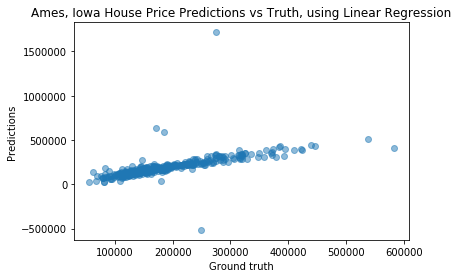

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


ss = StandardScaler()
mask = X_train_ohc.dtypes == np.float
float_columns = X_train_ohc.columns[mask]
trainingset = X_train_ohc.copy()  # copy because we dont want to scale this more than once.
testset = X_test_ohc.copy()
trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
testset[float_columns] = scaler.transform(testset[float_columns])
lr.fit(trainingset, _y_train)
y_test_pred = lr.predict(testset)


ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');

# Tree Based Regression

Let's now fit a non-linear model - decision trees

In [21]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [32]:
from sklearn.model_selection import cross_val_score

lr=LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
print(cross_val_score(lr, X=X_train_ohc, y=y_train_ohc, cv=5))
print(cross_val_score(dt, X=X_train_ohc, y=y_train_ohc, cv=5))


[-1.12335332e+10 -5.18426485e+08 -5.83478113e+06 -3.23515209e+08
 -2.64932489e+07]
[0.69861771 0.77331025 0.58199388 0.81653434 0.5817916 ]


In [33]:
from sklearn.metrics import r2_score

dt.fit(X_train_ohc, y_train_ohc)
y_pred = dt.predict(X_test_ohc)
print('R-sq:', r2_score(y_test_ohc, y_pred))
print('MSE:', mean_squared_error(y_test_ohc, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_ohc, y_pred)))

R-sq: 0.6987269090964754
MSE: 1818758881.5120773
RMSE: 42646.90940164454


In [55]:
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train_ohc, y_train_ohc)
y_pred = dt.predict(X_test_ohc)
print('R-sq:', r2_score(y_test_ohc, y_pred))
print('MSE:', mean_squared_error(y_test_ohc, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_ohc, y_pred)))

R-sq: 0.6482689821406216
MSE: 2123368903.3312316
RMSE: 46080.027162874285


# Finding the best Max Depth

Let's try and find the best max depth of the decision tree to tune the model

In [0]:
depths = []
r2 = []
rmse = []
for i in range(1, 100):
  dt = DecisionTreeRegressor(max_depth=i, random_state=42)
  dt.fit(X_train_ohc, y_train_ohc)
  y_pred = dt.predict(X_test_ohc)
  r2.append(r2_score(y_test_ohc, y_pred))
  rmse.append(np.sqrt(mean_squared_error(y_test_ohc, y_pred)))
  depths.append(i)

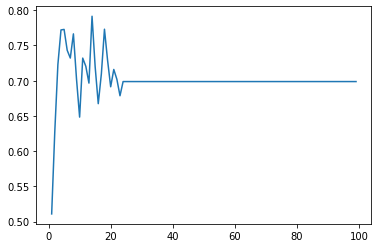

In [57]:
sns.lineplot(x=depths, y=r2)

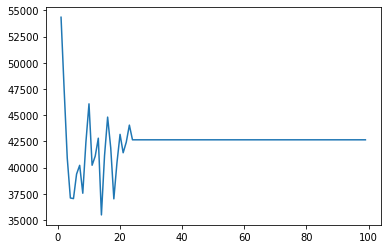

In [58]:
sns.lineplot(x=depths, y=rmse)

In [59]:
pd.DataFrame({'depth': depths, 'r2': r2, 'rmse': rmse}).head(20)

,depth,r2,rmse
0,1,0.510779,54345.024720
1,2,0.627217,47438.979263
2,3,0.722846,40904.221960
3,4,0.772055,37095.569190
4,5,0.772784,37036.197977
5,6,0.743180,39375.086405
6,7,0.732135,40212.925422
7,8,0.766463,37547.866714
8,9,0.702288,42394.083244
9,10,0.648269,46080.027163


In [60]:
dt = DecisionTreeRegressor(max_depth=18, random_state=42)
dt.fit(X_train_ohc, y_train_ohc)
y_pred = dt.predict(X_test_ohc)
print('R-sq:', r2_score(y_test_ohc, y_pred))
print('MSE:', mean_squared_error(y_test_ohc, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_ohc, y_pred)))

R-sq: 0.7730824672734223
MSE: 1369880983.3282797
RMSE: 37011.90326541287


### What do you think is wrong with the above approach?

# Ensemble Based Regression

Now lets try random forest, a tree-based ensemble model

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [62]:
rf.fit(X_train_ohc, y_train_ohc)
y_pred = rf.predict(X_test_ohc)
print('R-sq:', r2_score(y_test_ohc, y_pred))
print('MSE:', mean_squared_error(y_test_ohc, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_ohc, y_pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R-sq: 0.22171884929112695
MSE: 4698414156.140097
RMSE: 68544.97907316113


In [70]:
rf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
rf.fit(X_train_ohc, y_train_ohc)
y_pred = rf.predict(X_test_ohc)
print('R-sq:', r2_score(y_test_ohc, y_pred))
print('MSE:', mean_squared_error(y_test_ohc, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_ohc, y_pred)))

R-sq: 0.65526630733556
MSE: 2081126672.8454106
RMSE: 45619.367299924386


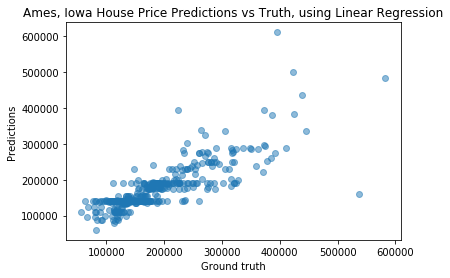

In [72]:
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');

In [73]:
rf = RandomForestClassifier(n_estimators=500, max_depth=18, random_state=42)
rf.fit(X_train_ohc, y_train_ohc)
y_pred = rf.predict(X_test_ohc)
print('R-sq:', r2_score(y_test_ohc, y_pred))
print('MSE:', mean_squared_error(y_test_ohc, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_ohc, y_pred)))

R-sq: 0.7817955880917291
MSE: 1317280647.1135266
RMSE: 36294.36109251031


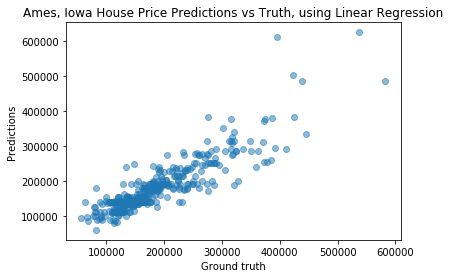

In [74]:
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');